In [1]:
from gradient_errors import Environment
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

In [2]:
env = Environment('data_normal.xlsx')

D:\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


In [3]:
lnV1 = torch.log(env.T1.V)
lnV2 = torch.log(env.T2.V)
lnV3 = torch.log(env.T3.V)
lnV4 = torch.log(env.T4.V)

In [4]:
env.chi2(env.T1.t, lnV1, params_name={'a': 'lnV01', 'b':'b1'})
env.chi2(env.T2.t, lnV2, params_name={'a': 'lnV02', 'b':'b2'})
env.chi2(env.T3.t, lnV3, params_name={'a': 'lnV03', 'b':'b3'})
env.chi2(env.T4.t, lnV4, params_name={'a': 'lnV04', 'b':'b4'})

D:\mipt_edu\2sem\labs\2.2.1\process\gradient_errors.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x).numpy(), torch.tensor(y).numpy()
D:\mipt_edu\2sem\labs\2.2.1\process\gradient_errors.py:113: RuntimeWarning: divide by zero encountered in true_divide
  reverse_axis = (np.mean(errors_x / x) > np.mean(errors_y / y)) and auto_reverse


Using reversed axis
Using reversed axis
Using reversed axis
Using reversed axis


(tensor(-4.4015, dtype=torch.float64, requires_grad=True),
 tensor(-0.0005, dtype=torch.float64, requires_grad=True))

In [5]:
lnVs = [lnV1.detach().numpy(), lnV2.detach().numpy(), lnV3.detach().numpy(), lnV4.detach().numpy()]
ts = [env.T1.t.detach().numpy(), env.T2.t.detach().numpy(), env.T3.t.detach().numpy(), env.T4.t.detach().numpy()]
As = [env.lnV01, env.lnV02, env.lnV03, env.lnV04]
Bs = [env.b1, env.b2, env.b3, env.b4]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


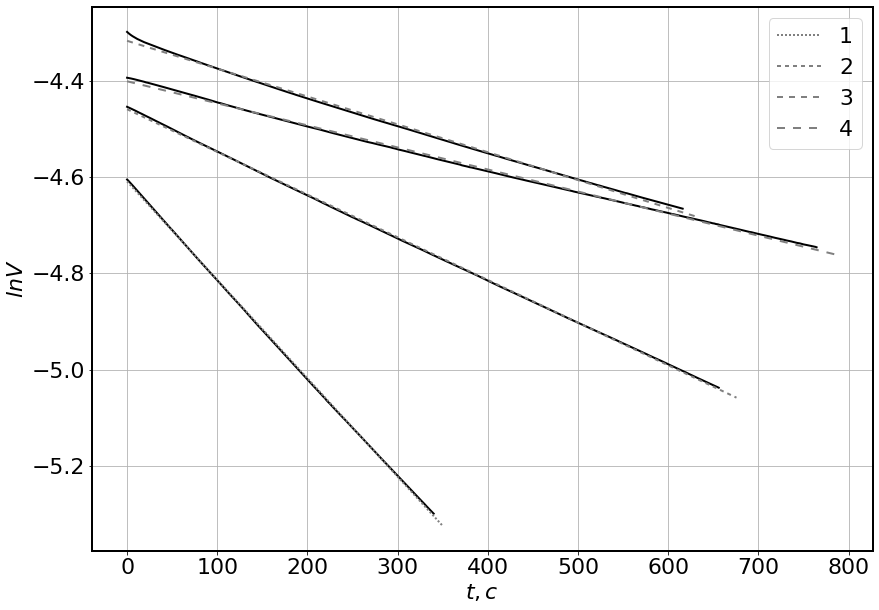

In [6]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

for i in range(4):
    ax.plot(ts[i], lnVs[i], linewidth=2, c='black')
    
    X = np.array([min(ts[i])*0.97, max(ts[i])*1.03])
    Y = As[i].item() + Bs[i].item()*X
    ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, i+1], label=str(i + 1))

ax.legend()

ax.set_ylabel(r"$ln V$")
ax.set_xlabel(r"$t, с$")
fig.savefig(r'../images/lnVt.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


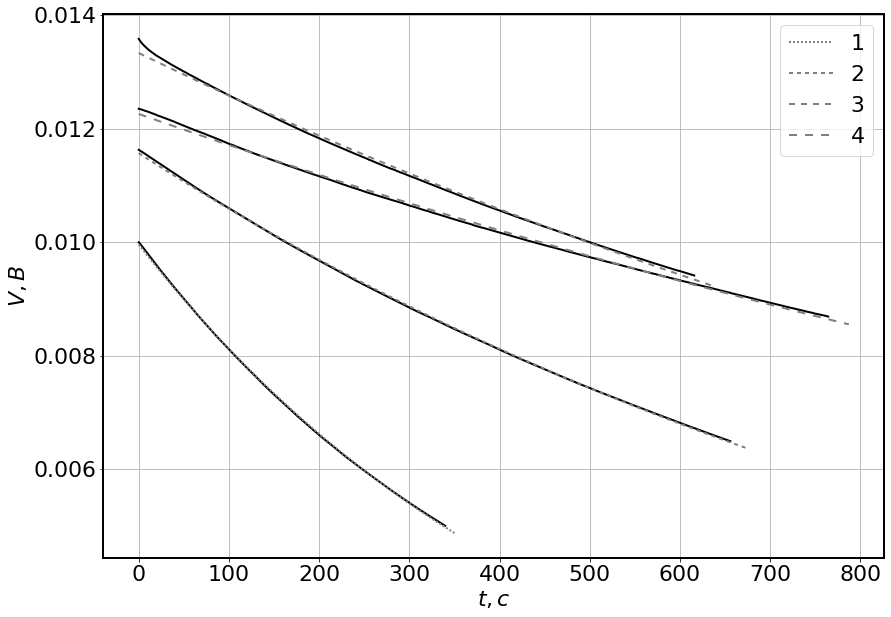

In [7]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

for i in range(4):
    ax.plot(ts[i], np.exp(lnVs[i]), linewidth=2, c='black')
    
    X = np.linspace(min(ts[i])*0.97, max(ts[i])*1.03, 100)
    Y = np.exp(As[i].item())*np.exp(Bs[i].item()*X)
    ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, i+1], label=str(i + 1))

ax.legend()

ax.set_ylabel(r"$V, В$")
ax.set_xlabel(r"$t, с$")
fig.savefig(r'../images/Vt.eps', format='eps')

In [8]:
D = [-env.V * env.L2S / 2 * Bs[i] for i in range(4)]
P1 = 1 / env.P.P

In [9]:
a, b = env.chi2(P1, D)

Using reversed axis


D:\mipt_edu\2sem\labs\2.2.1\process\gradient_errors.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x).numpy(), torch.tensor(y).numpy()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


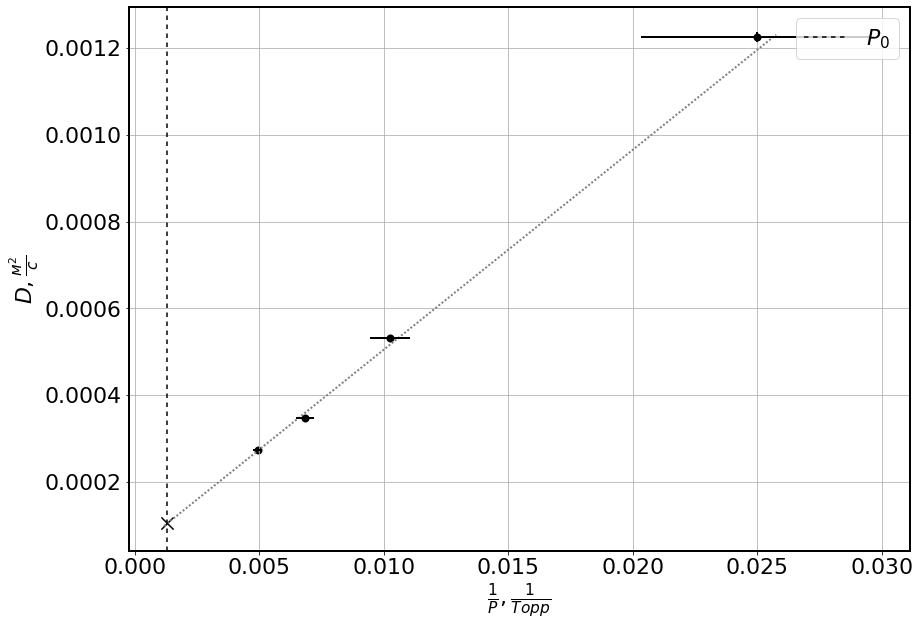

In [13]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

P_d, D_d = P1.detach().numpy(), [D[i].item() for i in range(4)]

ax.scatter(P_d, D_d, linewidth=2, c='black')

X = np.array([1 / 760*0.9, max(P_d)*1.03])
Y = a.item() + b.item()*X
ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 1])
ax.errorbar(P_d, D_d, xerr = env.get_error(P1), yerr = env.get_error(D), fmt='none', linewidth=2, c='black')
plt.axvline(x=1 / 760, c='black', dashes=[0, 0, 3], label='$P_0$')

ax.scatter(x=1 / 760, y=a.item() + b.item()/760, marker='x', c='black', s=150)

ax.legend()

ax.set_ylabel(r"$D, \frac{м^2}{c}$")
ax.set_xlabel(r"$\frac{1}{P}, \frac{1}{Торр}$")
fig.savefig(r'../images/D2P.eps', format='eps')

In [11]:
D_0 = a + b / 760

In [12]:
env.show(D_0, name='D_0')

('1.05', '0.24', -4)